In [69]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from time import gmtime, strftime
from sklearn.decomposition import PCA

In [63]:
my_path = str(os.getcwd())
X_train = np.load(my_path+'/.data/X_train_surge_new.npz')
Y_train = pd.read_csv(my_path+'/.data/Y_train_surge.csv')
X_test = np.load(my_path+'/.data/X_test_surge_new.npz')

In [64]:
print(X_train.files)
t_slp = X_train['t_slp']
t_surge1_input = X_train['t_surge1_input']
t_surge2_input = X_train['t_surge2_input']
t_surge1_output = X_train['t_surge1_output']
t_surge2_output = X_train['t_surge2_output']
slp = X_train['slp']
    

['id_sequence', 't_slp', 'slp', 't_surge1_input', 'surge1_input', 't_surge2_input', 'surge2_input', 't_surge1_output', 't_surge2_output']


In [65]:
print(slp.shape)
print(t_slp.shape)
print(t_surge1_input.shape)

print(40*41*41+10*4+40)

(5599, 40, 41, 41)
(5599, 40)
(5599, 10)
67320


In [66]:
idx = 16
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_slp[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge1_input[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge1_output[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge2_input[idx]])
print([strftime("%a, %d %b %Y %H:%M:%S",gmtime(int(t))) for t in t_surge2_output[idx]])

['Tue, 07 Feb 1950 03:00:16', 'Tue, 07 Feb 1950 06:00:32', 'Tue, 07 Feb 1950 08:59:44', 'Tue, 07 Feb 1950 12:00:00', 'Tue, 07 Feb 1950 15:00:16', 'Tue, 07 Feb 1950 17:59:28', 'Tue, 07 Feb 1950 20:59:44', 'Wed, 08 Feb 1950 00:00:00', 'Wed, 08 Feb 1950 03:00:16', 'Wed, 08 Feb 1950 06:00:32', 'Wed, 08 Feb 1950 08:59:44', 'Wed, 08 Feb 1950 12:00:00', 'Wed, 08 Feb 1950 15:00:16', 'Wed, 08 Feb 1950 17:59:28', 'Wed, 08 Feb 1950 20:59:44', 'Thu, 09 Feb 1950 00:00:00', 'Thu, 09 Feb 1950 03:00:16', 'Thu, 09 Feb 1950 06:00:32', 'Thu, 09 Feb 1950 08:59:44', 'Thu, 09 Feb 1950 12:00:00', 'Thu, 09 Feb 1950 15:00:16', 'Thu, 09 Feb 1950 17:59:28', 'Thu, 09 Feb 1950 20:59:44', 'Fri, 10 Feb 1950 00:00:00', 'Fri, 10 Feb 1950 03:00:16', 'Fri, 10 Feb 1950 06:00:32', 'Fri, 10 Feb 1950 08:59:44', 'Fri, 10 Feb 1950 12:00:00', 'Fri, 10 Feb 1950 15:00:16', 'Fri, 10 Feb 1950 17:59:28', 'Fri, 10 Feb 1950 20:59:44', 'Sat, 11 Feb 1950 00:00:00', 'Sat, 11 Feb 1950 03:00:16', 'Sat, 11 Feb 1950 06:00:32', 'Sat, 11 Feb 

In [67]:
times = []
for i in range(5599):
    time = np.concatenate((t_slp[i],t_surge1_input[i],t_surge1_output[i],t_surge2_input[i],t_surge2_output[i]))
    time = time-np.mean(time)
    times.append(time)
print(np.shape(times))
times = np.array(times)
print(times[0])

(5599, 80)
[-301632. -290816. -280000. -269184. -258432. -247616. -236800. -226048.
 -215232. -204416. -193600. -182784. -172032. -161216. -150400. -139648.
 -128832. -118016. -107200.  -96384.  -85632.  -74816.  -64000.  -53248.
  -42432.  -31616.  -20800.   -9984.     768.   11584.   22400.   33152.
   43968.   54784.   65600.   76416.   87168.   97984.  108800.  119552.
 -334016. -290816. -244032. -200832. -153984. -110848.  -67584.  -24448.
   22400.   65600.  112384.  155584.  198784.  241984.  288768.  331968.
  375168.  422016.  465152.  508416. -326784. -283648. -240384. -193600.
 -150400. -107200.  -60416.  -17216.   25984.   72768.  115968.  159168.
  205952.  249216.  292352.  339200.  382400.  425600.  472384.  515584.]


In [68]:
slpf = []
m = np.mean(slp)
#slp = slp - np.mean(slp)
for i in range(5599):
    slpf.append(slp[i].flatten()-m)

slpf = np.array(slpf)
print(slpf.shape)
print(slpf[0][:100])

(5599, 67240)
[ 971.65625 1040.6562  1096.6562  1136.6562  1163.6562  1175.6562
 1176.6562  1166.6562  1143.6562  1109.6562  1065.6562  1012.65625
  948.65625  876.65625  798.65625  713.65625  622.65625  527.65625
  423.65625  317.65625  218.65625  145.65625  136.65625  134.65625
  134.65625  140.65625  141.65625  132.65625   94.65625   44.65625
    1.65625  -41.34375  -75.34375  -98.34375 -112.34375 -120.34375
 -130.34375 -136.34375 -141.34375 -142.34375 -146.34375 1014.65625
 1091.6562  1154.6562  1202.6562  1233.6562  1250.6562  1253.6562
 1244.6562  1223.6562  1189.6562  1145.6562  1092.6562  1028.6562
  954.65625  875.65625  788.65625  695.65625  598.65625  499.65625
  397.65625  285.65625  282.65625  394.65625  366.65625  247.65625
  202.65625  183.65625  182.65625  130.65625   76.65625   27.65625
  -32.34375  -86.34375 -115.34375 -130.34375 -143.34375 -150.34375
 -151.34375 -149.34375 -151.34375 -149.34375 1049.6562  1134.6562
 1206.6562  1262.6562  1299.6562  1320.6562  1327.65

In [86]:
nb_comp = 1000
pca = PCA(n_components=nb_comp)
pca.fit(slpf)

PCA(n_components=1000)

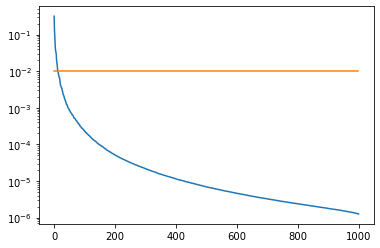

In [89]:
fig1,ax1 = plt.subplots()
ax1.plot(pca.explained_variance_ratio_)
plt.yscale("log")
ax1.plot([0.01 for _ in range(nb_comp)])